In [ ]:
# Support Vector Machine classification
# overview: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
# https://scikit-learn.org/stable/modules/svm.html
# in depth: https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote09.html
# https://online.stat.psu.edu/stat857/node/211/
# sklearns datasets
# https://scikit-learn.org/stable/datasets/toy_dataset.html
# https://scikit-learn.org/stable/datasets/real_world.html

# March 2023 / 2024

In [1]:
import os, sys
import numpy
import pandas

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


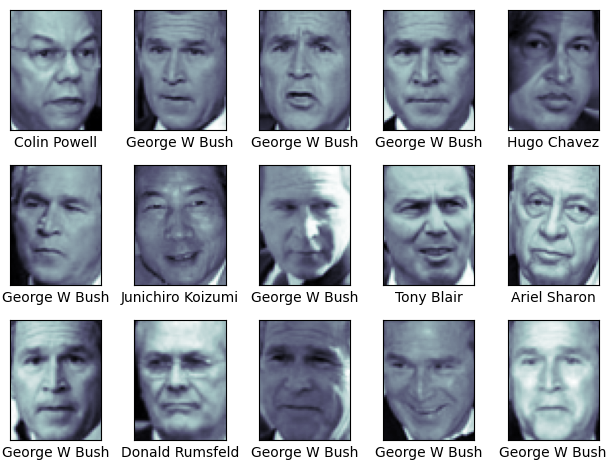

In [3]:
fig, ax = plt.subplots(3, 5)
for i, ax in enumerate(ax.flat):
    ax.imshow(faces.images[i], cmap='bone')
    ax.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

fig.tight_layout()

In [ ]:
# use a principal component analysis (see In Depth: Principal Component Analysis) to
# Principal component analysis is a versatile statistical method for reducing a cases-by-variables data table to its essential features,
# called principal components. Principal components are a few linear combinations of the original variables that maximally
# explain the variance of all the variables. Source: https://www.nature.com/articles/s43586-022-00184-w
#

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

#extract 150 fundamental components to feed into our support vector machine classifier !!
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)

In [8]:
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 59.3 s, sys: 43.3 s, total: 1min 42s
Wall time: 1min 2s
{'svc__C': 5, 'svc__gamma': 0.001}


In [11]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

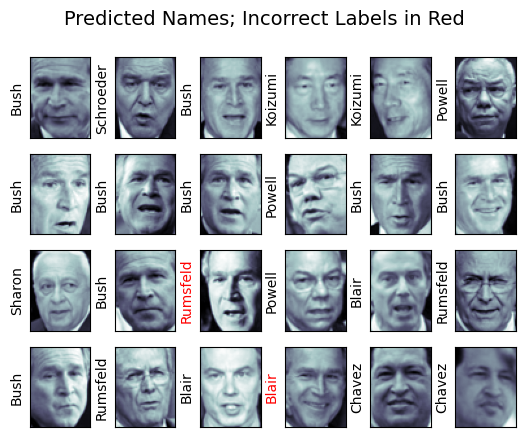

In [12]:
fig, ax = plt.subplots(4, 6)
for i, ax in enumerate(ax.flat):
    ax.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    ax.set(xticks=[], yticks=[])
    ax.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
#fig.tight_layout()

In [ ]:
from sklearn.metrics import classification_report
# precision, recall and f-score: https://en.wikipedia.org/wiki/Precision_and_recall
# support: https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



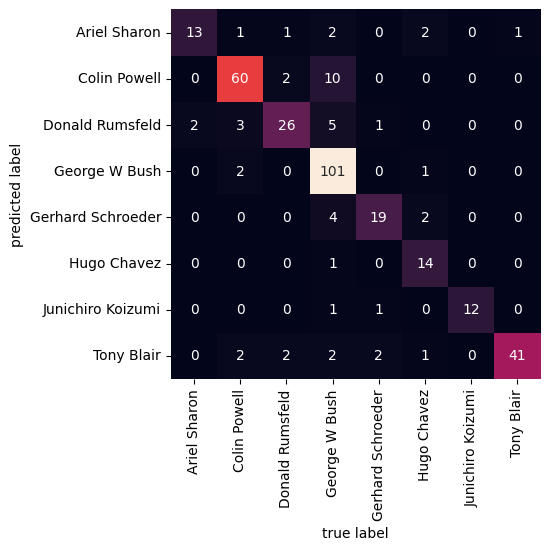

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn

mat = confusion_matrix(ytest, yfit)
seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label');